Implement the K-Means algorithm from scratch for the Iris dataset (load_iris). 
* Use only two features (e.g., sepal length and sepal width). 
* Display the final centroids and plot the clusters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()
X = iris.data[:, [0, 1]]
k = 3

In [9]:
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0],k,False)]

In [10]:
def closest_centroid(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def compute_centroid(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

In [11]:
for _ in range(100):
    labels = closest_centroid(X, centroids)
    new_centroids = compute_centroid(X, labels, k)
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

In [12]:
print("Final Centroids:\n", centroids)

Final Centroids:
 [[5.8        2.7       ]
 [5.00392157 3.40980392]
 [6.82391304 3.07826087]]


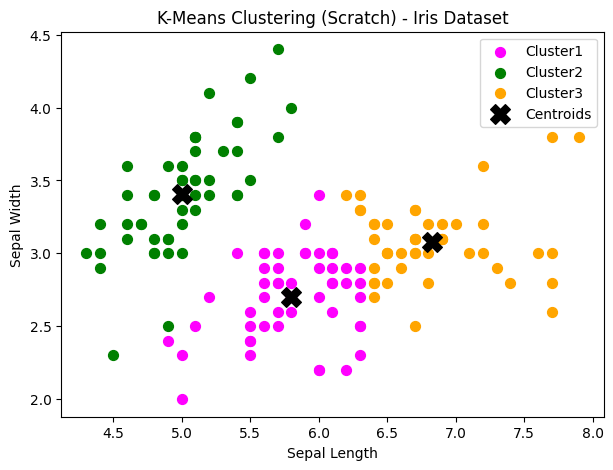

In [15]:
plt.figure(figsize=(7, 5))
colors = ['magenta', 'green', 'orange']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, color=colors[i], label=f'Cluster{i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='black', marker='X', label="Centroids")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering (Scratch) - Iris Dataset')
plt.legend()
plt.show()